In [1]:
import os
import glob
from utils.reference_fronts import ReferenceFronts
from utils.file_utils import parse_exp_log_dir, load_n_evaluation_log, parse_meta
from utils.performance_evaluator import PerformanceEvaluator
import pandas as pd

search_dir = "../data"
exp_dir_pattern = "N-obj"

subdirs = [
    os.path.join(search_dir, d)
    for d in os.listdir(search_dir)
    if os.path.isdir(os.path.join(search_dir, d)) and d.startswith(exp_dir_pattern)
]

meta_list = []
for subdir in subdirs:
    meta_list.append(parse_meta(exp_dir=subdir))

exp_df = pd.DataFrame(meta_list)

pe = PerformanceEvaluator()

In [2]:
exp_df

,population_size,dimension,n_objectives,tree,solver,exp_dir
0,100,2,5,breadth.json,GDE3,../data/N-obj-test_v14
1,100,2,4,breadth.json,GDE3,../data/N-obj-test_v13
2,100,2,4,breadth.json,NSGAII,../data/N-obj-test_v25
3,100,5,4,breadth.json,GDE3,../data/N-obj-test_v22
4,100,2,4,breadth.json,OMOPSO,../data/N-obj-test_v49
...,...,...,...,...,...,...
175,100,2,4,depth.json,MOEAD,../data/N-obj-test_v61
176,100,5,5,depth.json,NSGAII,../data/N-obj-test_v95
177,100,5,3,breadth.json,OMOPSO,../data/N-obj-test_v57
178,100,4,5,depth.json,MOEAD,../data/N-obj-test_v68


In [3]:
dimensions = [2]
n_objectives = [3, 4, 5]
trees = ["breadth.json"]
solvers = ["GDE3"]

filtered_exps = []
for _, row in exp_df.iterrows():
    for dimension in dimensions:
        for n_objective in n_objectives:
            for tree in trees:
                for solver in solvers:
                    if (
                        row["dimension"] == dimension
                        and row["n_objectives"] == n_objective
                        and row["tree"] == tree
                        and row["solver"] == solver
                    ):
                        filtered_exps.append(row)
filtered_exps = pd.DataFrame(filtered_exps)

In [4]:
filtered_exps

,population_size,dimension,n_objectives,tree,solver,exp_dir
0,100,2,5,breadth.json,GDE3,../data/N-obj-test_v14
1,100,2,4,breadth.json,GDE3,../data/N-obj-test_v13
17,100,2,3,breadth.json,GDE3,../data/N-obj-test_v12


In [5]:
var_keys = "n_objectives"
res_dict = {}

for _, row in filtered_exps.iterrows():
    eval_info = pe.get_evaluation_info(exp_dir=row["exp_dir"])
    print(row["solver"])
    generation_index = 1
    res = []
    for start_step in range(0, 100000, 100):
        generation_design_variables = eval_info["design_variables"][
            start_step : start_step + 100
        ]
        generation_objective_values = eval_info["objective_values"][
            start_step : start_step + 100
        ]
        gd = pe.compute_indicator(
            reference_set=eval_info["references"]["all_sets"],
            reference_front=eval_info["references"]["all_fronts"],
            actual_set=generation_design_variables,
            actual_front=generation_objective_values,
            indicator_type="GD",
        )
        igd = pe.compute_indicator(
            reference_set=eval_info["references"]["all_sets"],
            reference_front=eval_info["references"]["all_fronts"],
            actual_set=generation_design_variables,
            actual_front=generation_objective_values,
            indicator_type="IGD",
        )
        res.append(
            {
                "generation_index": generation_index,
                "gd_set": gd["set_indicator"],
                "igd_set": igd["set_indicator"],
                "gd_front": gd["front_indicator"],
                "igd_front": igd["front_indicator"],
            }
        )
        generation_index += 1
    res_dict[eval_info[var_keys]] = res

2024-09-19 09:01:34,895 - INFO - file_utils - Loading data from disk, file size 22267713
2024-09-19 09:01:35,037 - INFO - file_utils - Load complete, processing ...... 


GDE3


2024-09-19 09:02:30,494 - INFO - file_utils - Loading data from disk, file size 19554720
2024-09-19 09:02:30,598 - INFO - file_utils - Load complete, processing ...... 


GDE3


2024-09-19 09:02:35,170 - INFO - file_utils - Loading data from disk, file size 16578462
2024-09-19 09:02:35,257 - INFO - file_utils - Load complete, processing ...... 


GDE3


In [6]:
from matplotlib import pyplot as plt

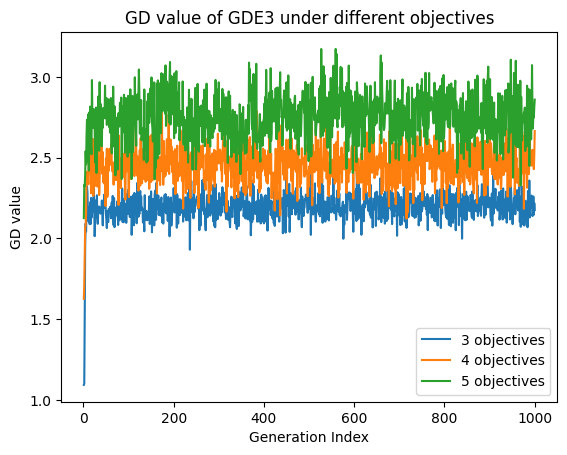

In [9]:
for index_key in [3, 4, 5]:
    current_df = pd.DataFrame(res_dict[index_key])
    x_axis = current_df.generation_index
    y_1 = current_df.gd_front
    plt.plot(x_axis, y_1, label=f"{index_key} objectives")
# plt.ylim(0,1.5)
plt.xlabel("Generation Index")
plt.ylabel("GD value")
plt.title(f"GD value of GDE3 under different objectives")
plt.legend()
plt.savefig("GD-GDE3.png")

In [10]:
res_dict[3]

[{'generation_index': 1,
  'gd_set': 0.7592771654376018,
  'igd_set': 0.4425318429055018,
  'gd_front': 1.0929106662556862,
  'igd_front': 0.9632873422389929},
 {'generation_index': 2,
  'gd_set': 0.7882803238870251,
  'igd_set': 0.477029485067499,
  'gd_front': 1.1020342998852066,
  'igd_front': 0.7050455112994208},
 {'generation_index': 3,
  'gd_set': 0.7074164180886205,
  'igd_set': 0.4385764807910796,
  'gd_front': 1.5454033529369413,
  'igd_front': 1.484146928564402},
 {'generation_index': 4,
  'gd_set': 0.7067806901749223,
  'igd_set': 0.4226911935250156,
  'gd_front': 1.9474002174875105,
  'igd_front': 2.2163450423789612},
 {'generation_index': 5,
  'gd_set': 0.7022803088037051,
  'igd_set': 0.4559315750509533,
  'gd_front': 2.092102436722433,
  'igd_front': 2.11117866741903},
 {'generation_index': 6,
  'gd_set': 0.7249167445029421,
  'igd_set': 0.47867421535979227,
  'gd_front': 2.0432380529394667,
  'igd_front': 1.9257188079468859},
 {'generation_index': 7,
  'gd_set': 0.65931